In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega a tabela imortação
imp_fert=pd.read_csv('~/git/BD/temp/imp_fert1.csv').reset_index(drop=True)
imp_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101597 entries, 0 to 101596
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CO_ANO      101597 non-null  int64 
 1   CO_MES      101597 non-null  int64 
 2   CO_NCM      101597 non-null  int64 
 3   CO_UNID     101597 non-null  int64 
 4   CO_PAIS     101597 non-null  int64 
 5   SG_UF_NCM   101597 non-null  object
 6   CO_VIA      101597 non-null  int64 
 7   CO_URF      101597 non-null  int64 
 8   QT_ESTAT    101597 non-null  int64 
 9   KG_LIQUIDO  101597 non-null  int64 
 10  VL_FOB      101597 non-null  int64 
 11  VL_FRETE    101597 non-null  int64 
 12  VL_SEGURO   101597 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 10.1+ MB


# ANOS

In [2]:
# Lista os anos
lista_anos = imp_fert.CO_ANO.unique().tolist()

def verificar_anos(anos):
    # Ordenar a lista de anos
    anos_ordenados = sorted(anos)
    
    # Verificar se todos os anos no intervalo estão presentes na lista
    for ano in range(anos_ordenados[0], anos_ordenados[-1] + 1):
        if ano not in anos_ordenados:
            return False
    return True

if verificar_anos(lista_anos):
    print(f"A tabela apresenta todos os anos entre {imp_fert.CO_ANO.min()} e {imp_fert.CO_ANO.max()}.")
else:
    print("A tabela não apresenta continuidade entre os anos.")


def verificar_tabela_completa(tabela):
    # Gerar todos os pares possíveis de CO_ANO e mês no intervalo da tabela
    CO_ANOs = range(tabela['CO_ANO'].min(), tabela['CO_ANO'].max() + 1)
    
    # Encontrar o primeiro CO_ANO e o primeiro mês registrado
    primeiro_CO_ANO = tabela['CO_ANO'].min()
    primeiro_CO_MES = tabela[tabela['CO_ANO'] == primeiro_CO_ANO]['CO_MES'].min()
    # Encontrar o último CO_ANO e o último mês registrado
    ultimo_CO_ANO = tabela['CO_ANO'].max()
    ultimo_CO_MES = tabela[tabela['CO_ANO'] == ultimo_CO_ANO]['CO_MES'].max()
    
    todos_pares = set()
    for CO_ANO in CO_ANOs:
        if CO_ANO == ultimo_CO_ANO:
            CO_MESes = range(1, ultimo_CO_MES + 1)
        else:
            CO_MESes = range(1, 13)
        todos_pares.update((CO_ANO, CO_MES) for CO_MES in CO_MESes)
    
    # Gerar os pares presentes na tabela
    pares_presentes = set(zip(tabela['CO_ANO'], tabela['CO_MES']))
    
    # Verificar se todos os pares possíveis estão presentes na tabela
    pares_faltando = todos_pares - pares_presentes
    
    if pares_faltando:
        print("A tabela não apresenta continuidade nos seguintes momentos:")
        for par in sorted(pares_faltando):
            print(par)
        #return False
    else:
        print("A tabela apresenta continuidade entre os meses.")
        #return True
    print(f"As datas vão de {str(primeiro_CO_MES)+'/'+str(primeiro_CO_ANO)} a {str(ultimo_CO_MES)+'/'+str(ultimo_CO_ANO)}.")

verificar_tabela_completa(imp_fert)

A tabela apresenta todos os anos entre 1997 e 2024.
A tabela apresenta continuidade entre os meses.
As datas vão de 1/1997 a 4/2024.


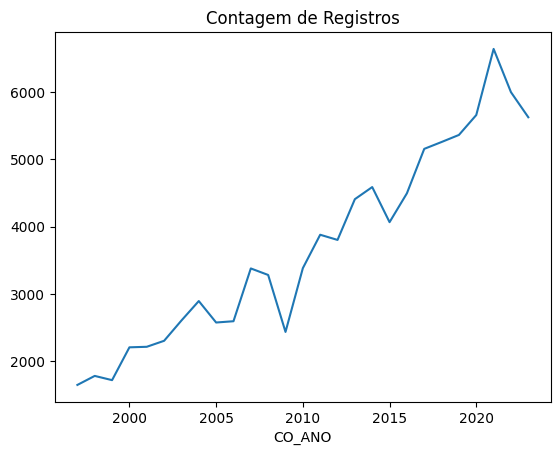

In [3]:
imp_fert[imp_fert.CO_ANO<2024].groupby('CO_ANO').CO_ANO.count().plot(title='Contagem de Registros')
plt.show()

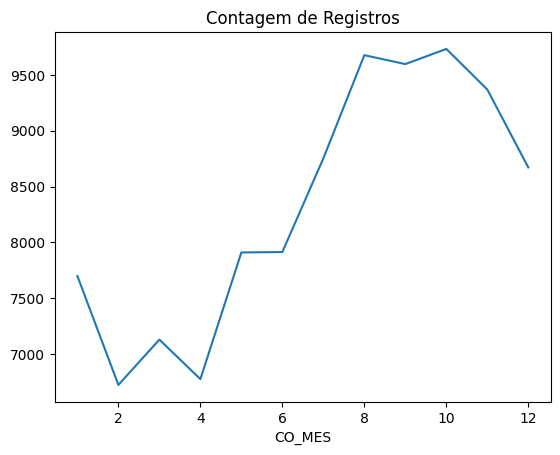

In [4]:
imp_fert[imp_fert.CO_ANO<2024].groupby('CO_MES').CO_MES.count().plot(title='Contagem de Registros')
plt.show()

# CO_NCM

In [5]:
imp_fert.CO_NCM.sort_values().unique()

array([31010000, 31021010, 31021090, 31022100, 31022910, 31022990,
       31023000, 31024000, 31025011, 31025019, 31025090, 31026000,
       31027000, 31028000, 31029000, 31031010, 31031020, 31031030,
       31031100, 31031900, 31039011, 31039019, 31039090, 31041000,
       31042010, 31042090, 31043010, 31043090, 31049010, 31049090,
       31051000, 31052000, 31053000, 31053010, 31053090, 31054000,
       31055100, 31055900, 31056000, 31059011, 31059019, 31059090])

In [6]:
len(imp_fert.CO_NCM.unique())

42

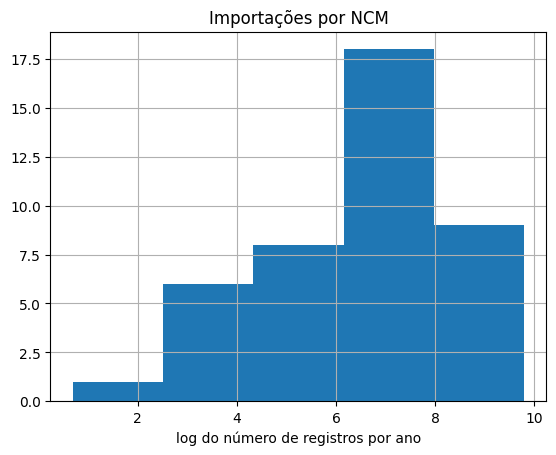

In [7]:
np.log(imp_fert.groupby('CO_NCM').CO_MES.count()\
.reset_index()\
.rename(columns={'CO_MES':'counter'}).counter).hist(bins=5)
plt.title('Importações por NCM')
plt.xlabel('log do número de registros por ano')
plt.show()

In [8]:
round(np.exp(6)),round(np.exp(8))

(403, 2981)

In [9]:
ncm=pd.read_csv('~/git/BD/Comexstat/tab_complementares/NCM.csv',encoding='Latin-1',sep=';')

In [10]:
ncm_sh=pd.read_csv('~/git/BD/Comexstat/tab_complementares/NCM_SH.csv',encoding='Latin-1',sep=';')

In [11]:
col_foco=['CO_SH2','NO_SH2_POR']
imp_fert.merge(ncm).merge(ncm_sh).groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by=col_foco).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)

,,#registros
CO_SH2,NO_SH2_POR,
31,Adubos (fertilizantes),101597


In [12]:
imp_fert=imp_fert.merge(ncm).merge(ncm_sh)

In [13]:
col_foco=['CO_SH2','CO_SH4','NO_SH4_POR']
imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)

#registros
CO_SH2 CO_SH4 NO_SH4_POR                                                    
31     3102   Adubos (fertilizantes) minerais ou químicos, az...       35088
       3105   Adubos (fertilizantes) minerais ou químicos, co...       34839
       3104   Adubos (fertilizantes) minerais ou químicos, po...       23461
       3103   Adubos (fertilizantes) minerais ou químicos, fo...        6107
       3101   Adubos (fertilizantes) de origem animal ou vege...        2102

In [14]:
imp_fert=imp_fert[imp_fert.CO_SH4!=3101]

In [15]:
col_foco=['CO_SH2','CO_SH4','CO_SH6','NO_SH6_POR']
count_sh6=imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)
count_sh6

#registros
CO_SH2 CO_SH4 CO_SH6 NO_SH6_POR                                                    
31     3104   310420 Cloreto de potássio para uso como fertilizante           19145
       3102   310210 Ureia, mesmo em solução aquosa                           12958
              310221 Sulfato de amônio                                        10522
       3105   310540 Diidrogeno-ortofosfato de amônio, inclusive mis...       10188
              310520 Adubos ou fertilizantes contendo nitrogênio, fó...        6445
              310590 Outros adubos ou fertilizantes minerais ou quím...        5868
              310559 Outros adubos ou fertilizantes minerais ou quím...        4226
              310510 Adubos ou fertilizantes em tabletes ou em embal...        4001
       3103   310310 Superfosfatos                                             3503
       3102   310260 Sais duplos e misturas de nitratos de cálcio e ...        3299
       3104   310430 Sulfato de potássio                                       2765
       3102   310290 Outros adubos ou fertilizantes minerais ou quím...        2579
              310250 Nitrato de sódio                                          2298
              310230 Nitrato de amônio, mesmo em solução aquosa                2204
       3105   310530 Hidrogeno-ortofosfato de diamônio                         1788
              310560 Adubos ou fertilizantes contendo fósforo e potá...        1770
       3104   310490 Outros adubos ou fertilizantes minerais ou quím...        1549
       3103   310311 Superfosfatos, que contenham, em peso, 35 % ou ...        1106
              310319 Outros superfosfatos                                      1063
       3102   310240 Misturas de nitrato de amônio com carbonato de ...         839
       3105   310551 Adubos ou fertilizantes contendo nitrato e fosfato         553
       3103   310390 Outros adubos ou fertilizantes minerais ou quím...         435
       3102   310229 Outros sais duplos e misturas de sulfato e nitr...         226
              310280 Misturas de ureia com nitrato de amônio, em sol...         149
              310270 Cianamida calcica                                           14
       3104   310410 Carnalita e outros sais de potássio, naturais, ...           2

In [16]:
imp_fert=imp_fert[imp_fert.CO_SH6.isin(count_sh6.reset_index().CO_SH6.head(6).values)]

In [17]:
col_foco=['CO_SH2','CO_SH4','CO_SH6','CO_NCM','NO_NCM_POR']
count_ncm=imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)
count_ncm

#registros
CO_SH2 CO_SH4 CO_SH6 CO_NCM   NO_NCM_POR                                                    
31     3104   310420 31042090 Outros cloretos de potássio                              17894
       3102   310210 31021010 Ureia, mesmo em solução aquosa, com teor de nit...       11480
              310221 31022100 Sulfato de amônio                                        10522
       3105   310540 31054000 Diidrogeno-ortofosfato de amônio (fosfato monoa...       10188
              310520 31052000 Adubos (fertilizantes) minerais ou químicos, qu...        6445
              310590 31059090 Outros adubos/fertilizantes minerais químicos c...        5147
       3102   310210 31021090 Outra ureia, mesmo em solução aquosa                      1478
       3104   310420 31042010 Cloreto de potássio, com teor de óxido de potás...        1251
       3105   310590 31059011 Nitrato de sódio potássico, com teor de nitrogê...         427
                     31059019 Outros nitratos de sódio potássico                         294

In [18]:
imp_fert=imp_fert[imp_fert.CO_NCM.isin(count_ncm.reset_index().CO_NCM.head(6).values)]

In [19]:
pd.options.display.max_colwidth=150

In [20]:
tab_name=imp_fert.groupby(by=['CO_NCM','NO_NCM_POR']).KG_LIQUIDO.count().sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'count'})
tab_name

,CO_NCM,NO_NCM_POR,count
0,31042090,Outros cloretos de potássio,17894
1,31021010,"Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco",11480
2,31022100,Sulfato de amônio,10522
3,31054000,"Diidrogeno-ortofosfato de amônio (fosfato monoamônico ou monoamoniacal), mesmo misturado com hidrogeno-ortofosfato de diamônio (fosfato diamônico ...",10188
4,31052000,"Adubos (fertilizantes) minerais ou químicos, que contenham os três elementos fertilizantes: nitrogênio (azoto), fósforo e potássio",6445
5,31059090,Outros adubos/fertilizantes minerais químicos com nitrogênio e potássio,5147


In [21]:
tab_name=tab_name.assign(nick=['MOP','UREIA','SAM','MAP','NPK','NP'])
tab_name

,CO_NCM,NO_NCM_POR,count,nick
0,31042090,Outros cloretos de potássio,17894,MOP
1,31021010,"Ureia, mesmo em solução aquosa, com teor de nitrogênio (azoto) superior a 45 %, em peso, calculado sobre o produto anidro no estado seco",11480,UREIA
2,31022100,Sulfato de amônio,10522,SAM
3,31054000,"Diidrogeno-ortofosfato de amônio (fosfato monoamônico ou monoamoniacal), mesmo misturado com hidrogeno-ortofosfato de diamônio (fosfato diamônico ...",10188,MAP
4,31052000,"Adubos (fertilizantes) minerais ou químicos, que contenham os três elementos fertilizantes: nitrogênio (azoto), fósforo e potássio",6445,NPK
5,31059090,Outros adubos/fertilizantes minerais químicos com nitrogênio e potássio,5147,NP


In [22]:
imp_fert=imp_fert.merge(tab_name)

# CO_UNID

In [23]:
imp_fert.groupby('CO_UNID').KG_LIQUIDO.count()

CO_UNID
10    61676
Name: KG_LIQUIDO, dtype: int64

In [24]:
unid=pd.read_csv('~/git/BD/Comexstat/tab_complementares/NCM_UNIDADE.csv',encoding='Latin-1',sep=';')
unid[unid.CO_UNID==10]

,CO_UNID,NO_UNID,SG_UNID
0,10,QUILOGRAMA LIQUIDO,KGL


In [25]:
imp_fert.drop(columns='CO_UNID',inplace=True)

# SG_UF_NCM

In [26]:
imp_fert_g=imp_fert.groupby('SG_UF_NCM').KG_LIQUIDO.count().sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'count_uf'})
imp_fert_g

,SG_UF_NCM,count_uf
0,SP,13115
1,MG,6578
2,PR,6513
3,RS,6230
4,MT,5945
5,GO,5336
6,BA,3098
7,SC,2355
8,MS,2274
9,ES,2039


array([[<Axes: title={'center': 'count_uf'}>]], dtype=object)

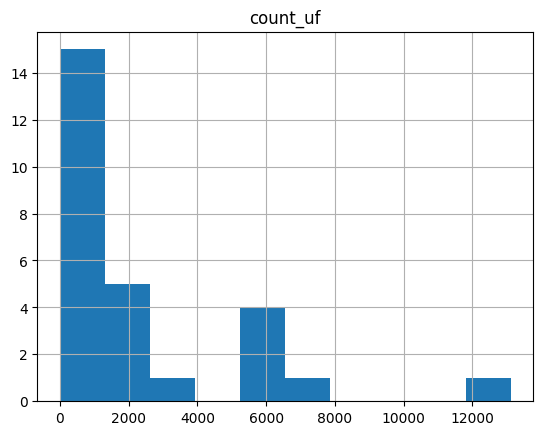

In [27]:
imp_fert_g.hist()

In [28]:
imp_fert_g[imp_fert_g.count_uf>10*10**3]

,SG_UF_NCM,count_uf
0,SP,13115


In [29]:
imp_fert_g[(imp_fert_g.count_uf>5*10**3)&(imp_fert_g.count_uf<10*10**3)]

,SG_UF_NCM,count_uf
1,MG,6578
2,PR,6513
3,RS,6230
4,MT,5945
5,GO,5336


In [30]:
imp_fert_g[(imp_fert_g.count_uf>3*10**3)&(imp_fert_g.count_uf<5*10**3)]

,SG_UF_NCM,count_uf
6,BA,3098


In [31]:
uf=pd.read_csv('~/git/BD/Comexstat/tab_complementares/UF.csv',encoding='Latin-1',sep=';')
uf

,CO_UF,SG_UF,NO_UF,NO_REGIAO
0,11,RO,Rondônia,REGIAO NORTE
1,12,AC,Acre,REGIAO NORTE
2,13,AM,Amazonas,REGIAO NORTE
3,14,RR,Roraima,REGIAO NORTE
4,15,PA,Pará,REGIAO NORTE
5,16,AP,Amapá,REGIAO NORTE
6,17,TO,Tocantins,REGIAO NORTE
7,21,MA,Maranhão,REGIAO NORDESTE
8,22,PI,Piauí,REGIAO NORDESTE
9,23,CE,Ceará,REGIAO NORDESTE


In [32]:
imp_fert_g=imp_fert_g.assign(new_uf=imp_fert_g.SG_UF_NCM)

In [33]:
imp_fert_g.loc[imp_fert_g.count_uf<3*10**3,'new_uf']='ZN'

In [34]:
imp_fert=imp_fert.merge(imp_fert_g)

In [35]:
imp_fert.SG_UF_NCM=imp_fert.new_uf

In [36]:
imp_fert.drop(columns='new_uf',inplace=True)

In [37]:
imp_fert.groupby('SG_UF_NCM').KG_LIQUIDO.count().sort_values(ascending=False)

SG_UF_NCM
ZN    14861
SP    13115
MG     6578
PR     6513
RS     6230
MT     5945
GO     5336
BA     3098
Name: KG_LIQUIDO, dtype: int64

# CO_URF

In [38]:
urf=pd.read_csv('~/git/BD/Comexstat/tab_complementares/URF.csv',encoding='Latin-1',sep=';')
urf.sort_values('CO_URF')

,CO_URF,NO_URF
19,0,0000000 - NAO INFORMADO
97,910,0000910 - SEFAZ-SC - CONVENIO CONSULTA SISTEMA CARGA
98,110100,0110100 - BRASILIA
99,117600,0117600 - AEROPORTO INTERNACIONAL DE BRASILIA
100,120100,0120100 - GOIANIA
...,...,...
260,1017800,1017800 - ALF - PORTO ALEGRE
261,1017801,1017801 - IRF - AEROPORTO INTERNACIONAL SALGADO FILHO
262,1017900,1017900 - ALF - SANTANA DO LIVRAMENTO
17,8110000,8110000 - NAO INFORMADO


In [39]:
imp_fert_g=imp_fert.groupby('CO_URF').KG_LIQUIDO.count().sort_values(ascending=False).reset_index().merge(urf).rename(columns={'KG_LIQUIDO':'count_urf'})

<Axes: >

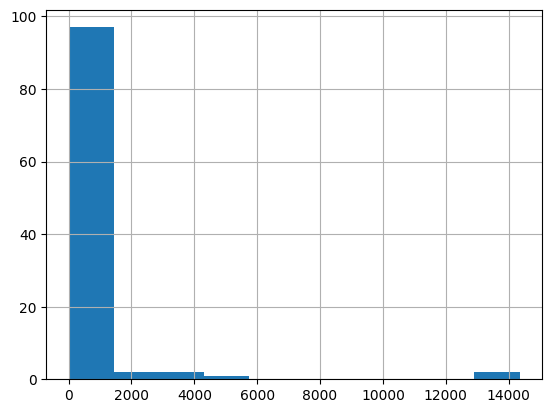

In [40]:
imp_fert_g.count_urf.hist()

<Axes: >

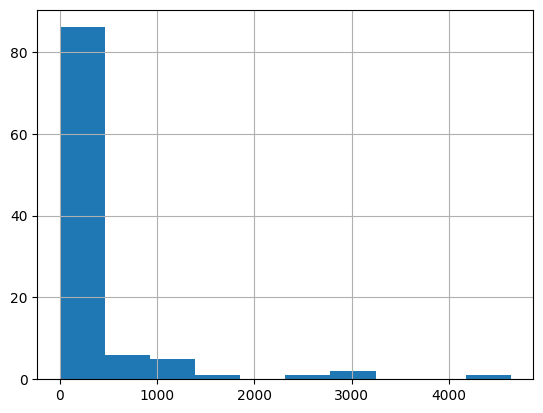

In [41]:
imp_fert_g[imp_fert_g.count_urf<6000].count_urf.hist()

In [42]:
imp_fert_g[(imp_fert_g.count_urf>2000)*(imp_fert_g.count_urf<4000)].NO_URF

3              1017700 - PORTO DE RIO GRANDE
4                        0910700 - PARANAGUA
5    0927700 - PORTO DE SAO FRANCISCO DO SUL
Name: NO_URF, dtype: object

<Axes: >

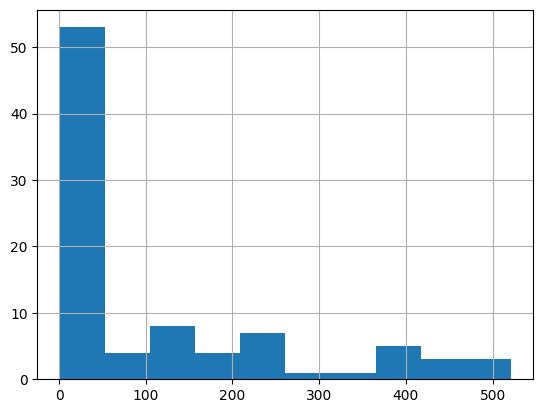

In [43]:
imp_fert_g[imp_fert_g.count_urf<600].count_urf.hist()

<Axes: >

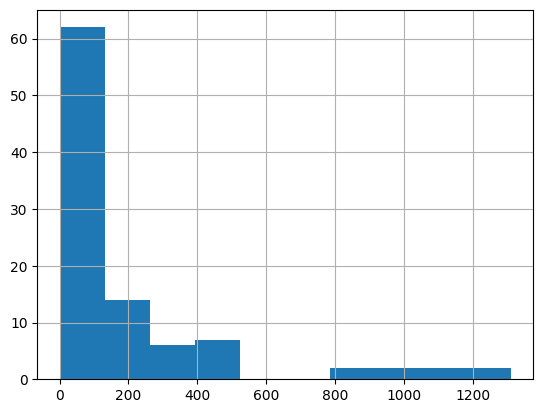

In [44]:
imp_fert_g[imp_fert_g.count_urf<1500].count_urf.hist()

In [45]:
imp_fert_g[(imp_fert_g.count_urf>600)*(imp_fert_g.count_urf<1400)].NO_URF

7                                         1010500 - RIO GRANDE
8                                     0517800 - ALF - SALVADOR
9                                  0327600 - PORTO DE SAO LUIS
10                                 0517600 - PORTO DE SALVADOR
11    0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO/GUARULHOS
12                                      1015400 - PORTO ALEGRE
13                                    0517602 - PORTO DE ARATU
14                           0717600 - PORTO DO RIO DE JANEIRO
Name: NO_URF, dtype: object

<Axes: >

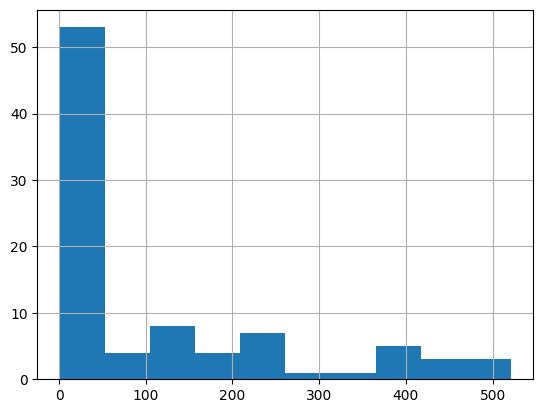

In [46]:
imp_fert_g[imp_fert_g.count_urf<600].count_urf.hist()

In [47]:
imp_fert_g=imp_fert_g.assign(new_co_urf=imp_fert_g.CO_URF)

In [48]:
imp_fert=imp_fert.merge(imp_fert_g)

In [49]:
imp_fert.new_co_urf.unique()

array([1015400,  817600,  920151,  717600,  817800, 1010500,  920251,
       1010252,  910152,  915100,  417600,  727600,  440100,  517600,
        320100,  117600,  510100,  260151,  520100, 1017600,  910600,
        925100,  717700, 1015300,  617600,  317600,  817700, 1011000,
        227600, 1010900,  910151,  917600,  417800,  517601,  325100,
        145200,  517602,  917601,  927601,  920351, 1010953,  317601,
        217601,  227700,  217602,  420100,  815500,  910700,  327600,
        927700,  910751,  920600,  417700, 1011200,  717800,  915200,
       1010200,  517700,  415100,  925251,  217600,  317602,  615100,
        917800, 1017700,  917801,  440151,  130151,  317800, 1015500,
        927800,  260152,  210200, 1015600,  317700,  420154, 1010253,
        910651,  147600,  320151,  517800,  417902,  217800,  417900,
        917900,  317902,  927502,  147800, 1017800, 1017500,  217802,
        317900,  917500,  317901,  617700, 1017801,  147852, 1017503,
        917501,  240

In [50]:
imp_fert.CO_URF=imp_fert.new_co_urf

In [51]:
imp_fert.CO_URF.unique()

array([1015400,  817600,  920151,  717600,  817800, 1010500,  920251,
       1010252,  910152,  915100,  417600,  727600,  440100,  517600,
        320100,  117600,  510100,  260151,  520100, 1017600,  910600,
        925100,  717700, 1015300,  617600,  317600,  817700, 1011000,
        227600, 1010900,  910151,  917600,  417800,  517601,  325100,
        145200,  517602,  917601,  927601,  920351, 1010953,  317601,
        217601,  227700,  217602,  420100,  815500,  910700,  327600,
        927700,  910751,  920600,  417700, 1011200,  717800,  915200,
       1010200,  517700,  415100,  925251,  217600,  317602,  615100,
        917800, 1017700,  917801,  440151,  130151,  317800, 1015500,
        927800,  260152,  210200, 1015600,  317700,  420154, 1010253,
        910651,  147600,  320151,  517800,  417902,  217800,  417900,
        917900,  317902,  927502,  147800, 1017800, 1017500,  217802,
        317900,  917500,  317901,  617700, 1017801,  147852, 1017503,
        917501,  240

In [52]:
imp_fert.drop(columns='new_co_urf',inplace=True)

In [53]:
imp_fert_g=imp_fert.groupby('CO_URF').KG_LIQUIDO.count()\
.sort_values(ascending=False).reset_index()

imp_fert_g

,CO_URF,KG_LIQUIDO
0,817800,14347
1,917800,13339
2,727600,4633
3,1017700,3239
4,910700,3141
...,...,...
99,517801,1
100,812051,1
101,910151,1
102,917501,1


In [54]:
urf.CO_URF.max()

9999999

In [55]:
imp_fert_g=imp_fert_g.merge(urf[['CO_URF','NO_URF']])

imp_fert_g

,CO_URF,KG_LIQUIDO,NO_URF
0,817800,14347,0817800 - PORTO DE SANTOS
1,917800,13339,0917800 - PORTO DE PARANAGUA
2,727600,4633,0727600 - PORTO DE VITORIA
3,1017700,3239,1017700 - PORTO DE RIO GRANDE
4,910700,3141,0910700 - PARANAGUA
...,...,...,...
99,517801,1,0517801 - IRF - AEROPORTO INTERNACIONAL DE SALVADOR
100,812051,1,0812051 - SAO SEBASTIAO
101,910151,1,0910151 - SAO JOSE DOS PINHAIS
102,917501,1,0917501 - IRF - GUAÍRA


# CO_PAIS

In [56]:
pais=pd.read_csv('~/git/BD/Comexstat/tab_complementares/PAIS.csv',encoding='Latin-1',sep=';')
pais

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"
...,...,...,...,...,...,...
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação


In [57]:
len(pais)

281

In [58]:
len(imp_fert.CO_PAIS.unique())

102

<Axes: >

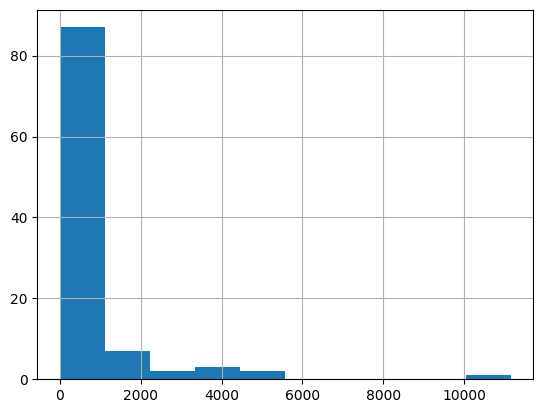

In [59]:
imp_fert_g=imp_fert.groupby('CO_PAIS').KG_LIQUIDO.count()
imp_fert_g.hist()

In [60]:
imp_fert_g=imp_fert_g.reset_index().rename(columns={'KG_LIQUIDO':'count_pais'})

In [61]:
imp_fert_g=imp_fert_g.assign(new_co_pais=imp_fert_g.CO_PAIS)

In [62]:
imp_fert_g.loc[imp_fert_g.count_pais<1000,'new_co_pais']=999

In [63]:
imp_fert=imp_fert.merge(imp_fert_g)

In [64]:
imp_fert.CO_PAIS=imp_fert.new_co_pais

In [65]:
imp_fert=imp_fert.drop(columns='new_co_pais')

In [66]:
imp_fert.groupby('CO_PAIS').KG_LIQUIDO.count().sort_values()

CO_PAIS
603     1123
158     1186
154     1265
831     1308
573     1679
474     1963
87      2175
245     2337
85      2945
149     3906
160     3978
383     3978
23      5076
249     5416
676    11155
999    11530
Name: KG_LIQUIDO, dtype: int64

# CO_VIA

In [67]:
# Identifica a via líder em movimentação 
via=pd.read_csv('~/git/BD/Comexstat/tab_complementares/VIA.csv',encoding='Latin-1',sep=';')

rank_via=imp_fert.groupby('CO_VIA').KG_LIQUIDO.count().sort_values(ascending=False).reset_index()

rank_via=rank_via.merge(via)

rank_via

,CO_VIA,KG_LIQUIDO,NO_VIA
0,1,58168,MARITIMA
1,4,1764,AEREA
2,7,960,RODOVIARIA
3,6,121,FERROVIARIA
4,2,4,FLUVIAL
5,5,2,POSTAL
6,9,1,MEIOS PROPRIOS


# QT_ESTAT

A coluna QT_ESTAT contém valores em unidades utilizadas no país de origem, que podem não ser igual ao quilograma, mas que não é de interesse deste projeto.

# Finalizando  

As demais colunas categóricas não mencionadas até aqui serão descartadas.

In [68]:
len(imp_fert)

61020

In [69]:
imp_fert=imp_fert[['CO_ANO','CO_MES','CO_NCM','nick','SG_UF_NCM','CO_PAIS','CO_URF','KG_LIQUIDO','VL_FOB','VL_FRETE','VL_SEGURO']].sort_values(by=['CO_ANO','CO_MES','CO_NCM','nick','SG_UF_NCM','CO_PAIS','CO_URF']).reset_index(drop=True)

In [70]:
imp_fert.to_csv('~/git/BD/temp/imp_fert_cat.csv',index=False)